In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data=pd.read_csv('Downloads/python and ML notes/Refactored_Py_DS_ML_Bootcamp-master/15-Decision-Trees-and-Random-Forests/loan_data.csv')

In [4]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


## Feature Engineering

C:\Users\91926\AppData\Local\Temp\ipykernel_18804\1387982591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['fico'])


<Axes: xlabel='fico', ylabel='Density'>

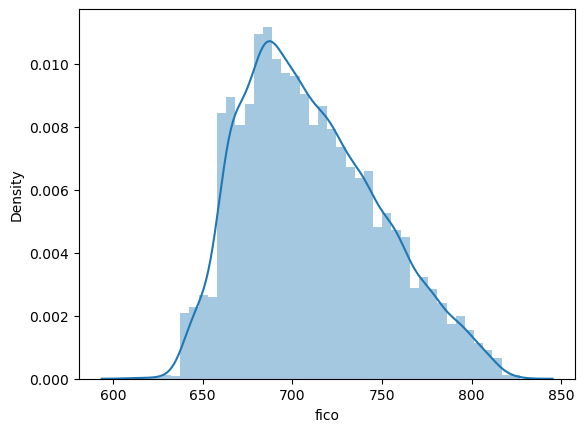

In [7]:
sns.distplot(data['fico'])

Text(0.5, 0, 'FICO')

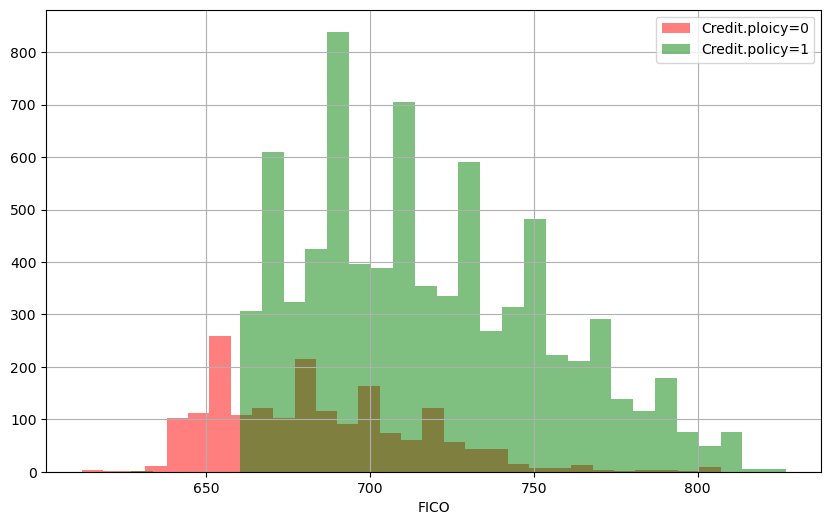

In [8]:
plt.figure(figsize=(10,6))
data[data['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.ploicy=0')
data[data['credit.policy']==1]['fico'].hist(alpha=0.5,color='green',bins=30,label='Credit.policy=1')
plt.legend()
plt.xlabel('FICO')

In [9]:
data['not.fully.paid'].unique()

array([0, 1], dtype=int64)

Text(0.5, 0, 'FICO')

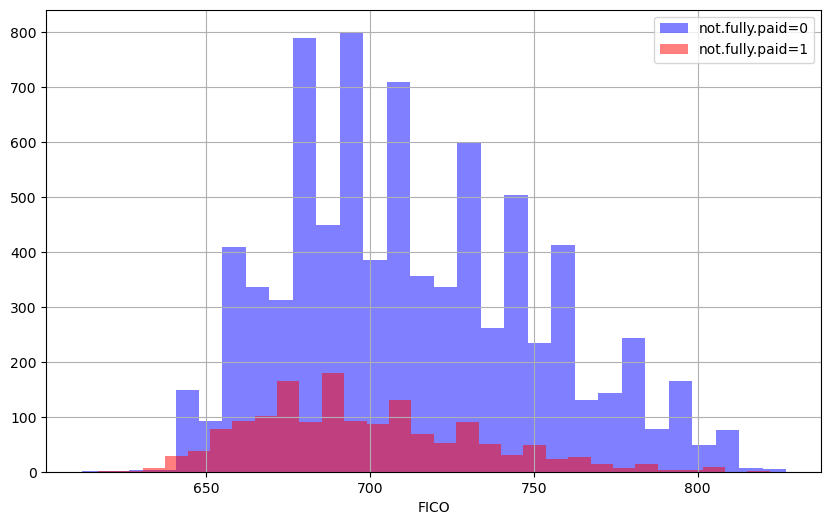

In [10]:
plt.figure(figsize=(10,6))
data[data['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=0')
data[data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=1')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

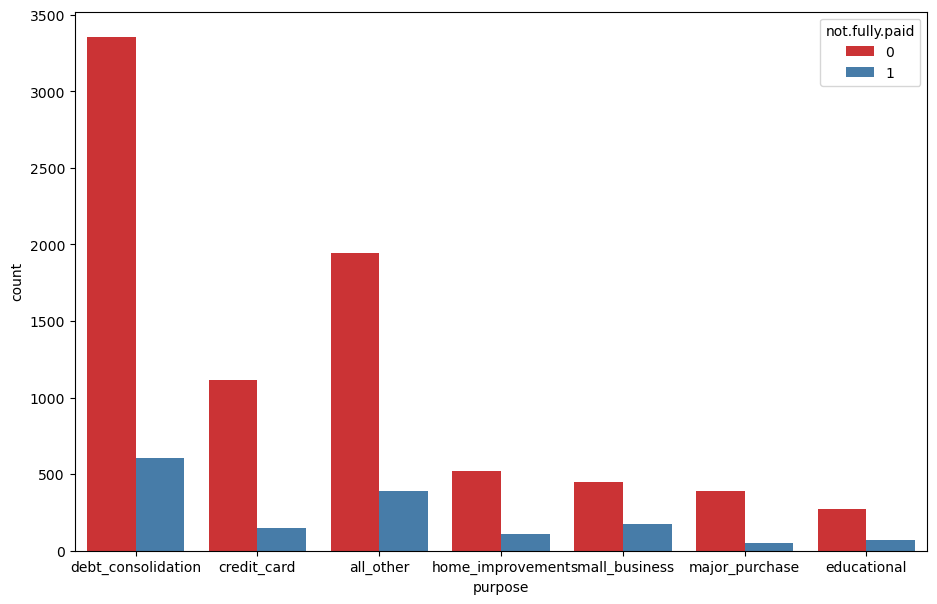

In [11]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',data=data,hue='not.fully.paid',palette='Set1')

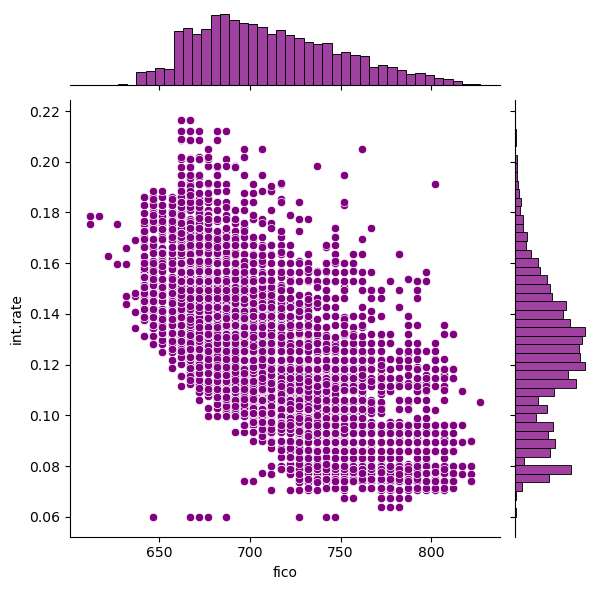

In [12]:
sns.jointplot(x='fico',y='int.rate',data=data,color='purple')

<Figure size 1000x600 with 0 Axes>

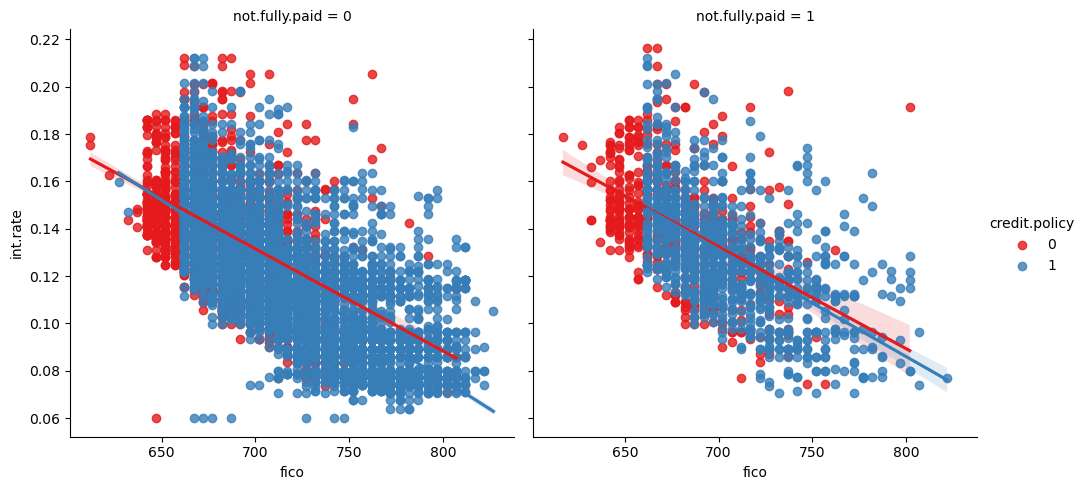

In [13]:
plt.figure(figsize=(10,6))
sns.lmplot(y='int.rate',x='fico',data=data,hue='credit.policy',col='not.fully.paid',palette='Set1')

## Dealing with Categorical variable

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [15]:
cat_feat=['purpose']

In [16]:
final_data=pd.get_dummies(data,columns=cat_feat,drop_first=True)

In [17]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [18]:
x=final_data.drop('not.fully.paid',axis=1)

In [19]:
y=final_data['not.fully.paid']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

## Decision Tree Model

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree=DecisionTreeClassifier()

In [26]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
pred_dtree=dtree.predict(x_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [36]:
print(confusion_matrix(y_test,pred_dtree))

[[2002  429]
 [ 347   96]]


## Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc=RandomForestClassifier(n_estimators=600)

In [39]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=600)

In [40]:
pred_rfc=rfc.predict(x_test)

In [43]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [44]:
print(confusion_matrix(y_test,pred_rfc))

[[2424    7]
 [ 434    9]]


### What performed better the random forest or the decision tree

In [ ]:
# Depends what metric you are trying to optimize for. 
# Notice the recall for each class for the models.
# Neither did very well, more feature engineering is needed.

# THANKS